# NLP for Movie Recommender System based on movie plot

Dataset = [The Movie Database (TMDb)](https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv)

In [1]:
# import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

## Data Preparations

In [2]:
df = pd.read_csv('data/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Data Exploratory

In [3]:
movie_df = df[['overview', 'title']]
movie_df

,overview,title
0,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,A cryptic message from Bond’s past sends him o...,Spectre
3,Following the death of District Attorney Harve...,The Dark Knight Rises
4,"John Carter is a war-weary, former military ca...",John Carter
...,...,...
4798,El Mariachi just wants to play his guitar and ...,El Mariachi
4799,A newlywed couple's honeymoon is upended by th...,Newlyweds
4800,"""Signed, Sealed, Delivered"" introduces a dedic...","Signed, Sealed, Delivered"
4801,When ambitious New York attorney Sam is sent t...,Shanghai Calling


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  4800 non-null   object
 1   title     4803 non-null   object
dtypes: object(2)
memory usage: 75.2+ KB


In [5]:
movie_df.dropna(inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  4800 non-null   object
 1   title     4800 non-null   object
dtypes: object(2)
memory usage: 112.5+ KB


## Preprocessing with SpaCy

In [6]:
# Create spacy 'english' model
nlp = spacy.load('en_core_web_sm')

# create stopwords list with spacy
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# preprocess function with spacy to cleaned data
def preprocess(text):
    doc = nlp(text)
    # lemmas
    lemmas = [token.lemma_ for token in doc]
    lemmas_cleaned = [lemma for lemma in lemmas if lemma.isalpha() \
        and lemma not in stopwords]
    return ' '.join(lemmas_cleaned)

In [7]:
# create new feature from overview
movie_df['overview_cleaned'] = movie_df['overview'].apply(preprocess)
movie_df[['overview','overview_cleaned']].head()

,overview,overview_cleaned
0,"In the 22nd century, a paraplegic Marine is di...",century paraplegic Marine dispatch moon Pandor...
1,"Captain Barbossa, long believed to be dead, ha...",Captain Barbossa long believe dead come life h...
2,A cryptic message from Bond’s past sends him o...,cryptic message Bond past send trail uncover s...
3,Following the death of District Attorney Harve...,follow death District Attorney Harvey Dent Bat...
4,"John Carter is a war-weary, former military ca...",John Carter war weary military captain inexpli...


## Modeling

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tvec = TfidfVectorizer()

ov_vec = tvec.fit_transform(movie_df['overview_cleaned'])

In [9]:
# get_recommendation function return 10 similar movies
def get_recommendation(title):
    # create list_title based on pandas series
    list_title = pd.Series(movie_df.index, index=movie_df['title'])

    # similarity score with linear kernel
    similarity = linear_kernel(ov_vec, ov_vec)
    if title in list_title:
        idx = list_title[title]
        
        # sort movies base on similarity score
        sim_scores = list(enumerate(similarity[idx]))
        sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)

        # 10 most similar movies
        sim_scores = sim_scores[1:11]

        # get movie title
        movie_title = [i[0] for i in sim_scores]

        return movie_df['title'].iloc[movie_title]

    else:
        print('Movies is not in the list')

In [67]:
# get_recommendation_plot function return 10 similar movies with plot
def get_recommendation_plot(title):
    # create list_title based on pandas series
    list_title = pd.Series(movie_df.index, index=movie_df['title'])

    # similarity score with linear kernel
    similarity = linear_kernel(ov_vec, ov_vec)
    if title in list_title:
        idx = list_title[title]
        
        # sort movies base on similarity score
        sim_scores = list(enumerate(similarity[idx]))
        sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse=True)

        # 10 most similar movies
        sim_scores = sim_scores[1:11]

        # get movie title
        movie_title = [i[0] for i in sim_scores]

        recommendation_df = pd.DataFrame(sim_scores, columns=['id', 'similarity_score'])
        recommendation_df['title'] = list(movie_df['title'].iloc[movie_title])
        
        # visualize movie similarity
        plt.figure(figsize=(12, 8))
        ax = sns.barplot(x='similarity_score', y='title', data=recommendation_df, palette='cividis')
        plt.xlabel('Similarity Score (linear kernel)')
        plt.ylabel('Movie Title')
        plt.title(f'Movie Recommendation to {title}')
    else:
        print('Movies is not in the list')

## Testing

In [10]:
get_recommendation('Avatar')

3604                       Apollo 18
2130                    The American
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
2669             Crocodile Dundee II
942                 The Book of Life
847                         Semi-Pro
1345                  Dolphin Tale 2
91      Independence Day: Resurgence
Name: title, dtype: object

In [11]:
get_recommendation('Dilan')

Movies is not in the list


In [12]:
get_recommendation('Captain America: Civil War')

85      Captain America: The Winter Soldier
2686                   An American Haunting
7                   Avengers: Age of Ultron
1806                        Accidental Love
1715                                Timecop
1586                       A View to a Kill
29                                  Skyfall
653                          This Means War
728                                 Hellboy
1678                        United Passions
Name: title, dtype: object

## Plot Testing

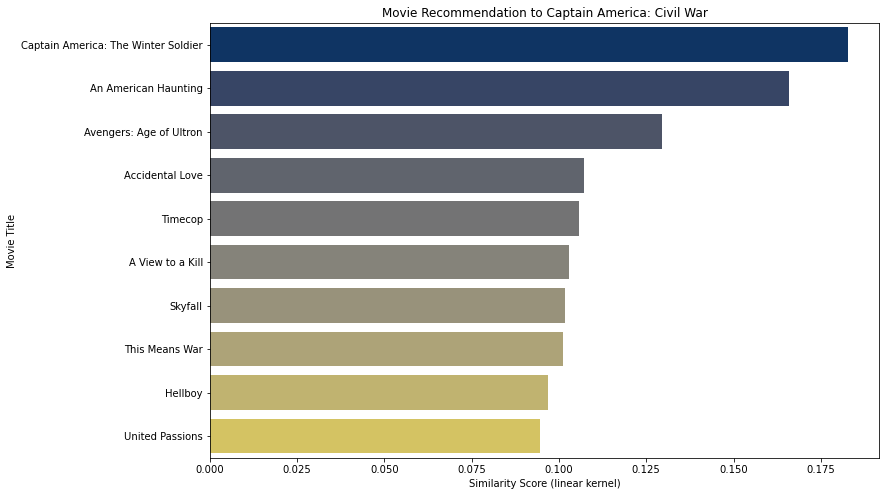

In [69]:
get_recommendation_plot('Captain America: Civil War')

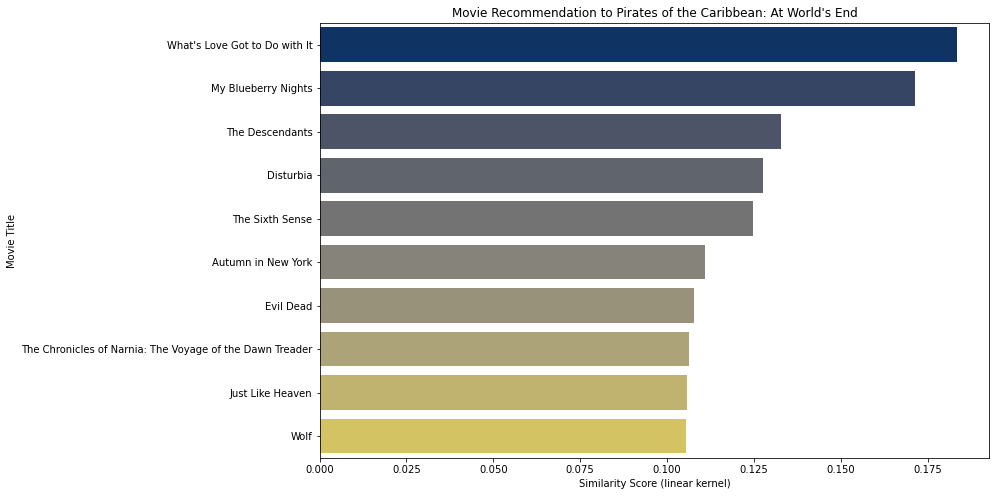

In [70]:
get_recommendation_plot("Pirates of the Caribbean: At World's End")

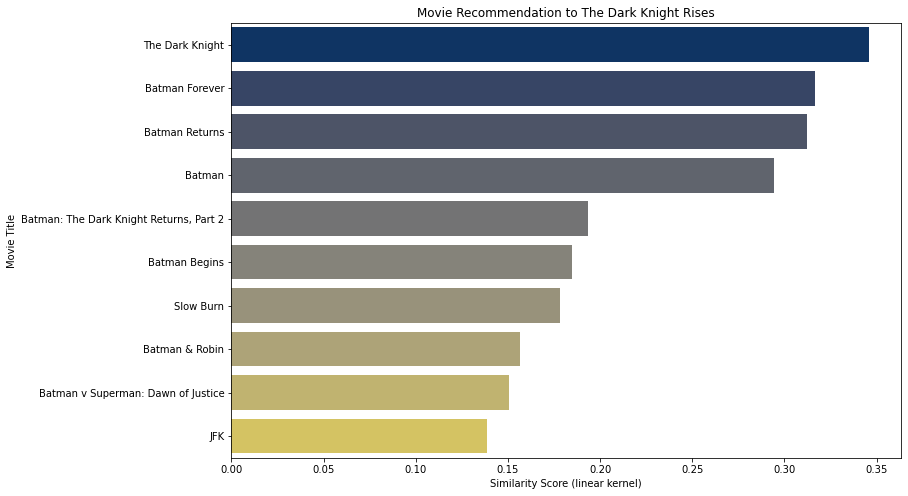

In [71]:
get_recommendation_plot('The Dark Knight Rises')